# <font color='gold'>**_Análise Exploratória: Catálogo Netflix_**</font> 🎥

# <font color='gold'>**_Objetivos da Análise_**</font> 🎯

Nesse projeto, realizaremos uma Análise Exploratória de Dados (EDA) em um [dataset](https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset) que contém dados relacionados ao catálogo de programas da Netflix, onde buscaremos compreender esses dados e realizar análises pertinentes a eles (essas análises serão delimitadas após a fase de limpeza e tratamento dos dados). Mais especificamente, nesse projeto iremos:

- 🎲 Coletar e compreender os dados (shape, data types, nulls, outliers, etc.);

- 🧹 Limapar e tratar os dados da maneira mais apropriada para as análises;

- 📈 Realizar análises com recursos visuais como gráficos e plots, gerando insights mais profundos sobre os dados disponíveis.

# <font color='gold'>**_Importando Pacotes, Coletando e Compreendendo Dados_**</font> 🧰🎲

In [411]:
# Importando as bibliotecas que serão utilizadas para a realização das análises:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# Definindo algumas configurações iniciais:
sns.set(context='notebook', style='darkgrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
warnings.filterwarnings('ignore')

print('Pacotes prontos! Versões Utilizadas:')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy       --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Seaborn     --> {sns.__version__}')

Pacotes prontos! Versões Utilizadas:
Pandas      --> 1.4.2
Numpy       --> 1.21.5
Matplotlib  --> 3.6.2
Seaborn     --> 0.11.2


In [412]:
# Criando o DataFrame:
data = pd.read_csv('data/netflix_movies.csv', sep=',')

In [413]:
# Visualizando os primeiros 5 registros do DataFrame
data.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [414]:
# Visualizando um sample aleatório do DataFrame:
data.sample(5)

,title,year,certificate,duration,genre,rating,description,stars,votes
514,Crazy Ex-Girlfriend,(2015–2019),TV-14,42 min,"Comedy, Musical",7.8,A young woman abandons a choice job at a law f...,"['Rachel Bloom, ', 'Donna Lynne Champlin, ', '...","20,397"
4640,The Intent,(2016),NaN,104 min,"Crime, Drama",4.3,An undercover police officer finds his loyalti...,"['Femi Oyeniran, ', 'Kalvadour Peterson', '| '...",922
8406,The Order,(2019–2020),TV-MA,49 min,"Drama, Fantasy, Horror",7.7,"As chaos reigns, the Knights must convince Ver...","['Kristin Lehman', '| ', ' Stars:', 'Jake M...",425
3177,Criminal: France,(2019),NaN,39 min,"Crime, Drama, Mystery",7.2,Secrets emerge and entire cases unravel inside...,"['Margot Bancilhon, ', 'Laurent Lucas, ', 'Sté...","4,140"
9252,Cannon Busters,(2019– ),TV-MA,NaN,"Animation, Fantasy",7.1,Add a Plot,"['John Eric Bentley, ', 'Kenny Blank, ', 'D.C....",46


In [415]:
# Determinando as dimensões do DataFrame:
data.shape

(9957, 9)

Com essa informação, sabemos que nosso DataFrame é composto por **9957 registros** em **9 variáveis** diferentes.

In [416]:
# Coletando mais informações acerca do DataFrame utilizando o comando .info():
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


Utilizando o comando .info(), podemos estrair algumas informações iniciais importantes sobre os dados:

- Apenas as colunas **`title`**, **`description`** e **`stars`** possuem registros completos sem valores nulos;

- Das 9 colunas, 8 estão no formato *object* (string), sendo que algumas delas como as colunas `year` e `votes` por exemplo poderiam e deveriam estar em valores numéricos.

A seguir, iremos realizar uma checagem mais focada nos dados faltantes do DataFrame:

In [417]:
# Checando quantidade de valores nulos no Dataset:
data.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

Podemos notar que temos muitos dados faltantes no Dataset. Para compreendermos de uma maneira mais facil a dimensão desses valores nulos comaparados ao Dataset como um todo, iremos analisar em porcentagem a quantidade de nulos:

In [418]:
# Checando porcentagem de dados faltantes no DataFrame:
nulls_percentage = (
    ((data.isnull().sum()/data.shape[0]) * 100
    ).sort_values(ascending=False)
    ).round(2)

nulls_percentage

certificate    34.68
duration       20.45
rating         11.78
votes          11.78
year            5.29
genre           0.73
title           0.00
description     0.00
stars           0.00
dtype: float64

Dos registros presentes nas 9 colunas do DataFrame, as colunas:

- **`certificate`** possui 34.68% de valores nulos;

- **`duration`** possui 20.45% de valores nulos;

- **`rating`** e **`votes`** possuem 11.78% de valores nulos;

- **`year`** possui 5.29% de valores nulos;

- **`genre`** possui 0.73% de valores nulos.

## **Dicionário de Variáveis** 📖

Para termos uma compreensão ainda maior acerca dos nossos dados, realizaremos uma descrição de cada uma das colunas presentes no DataFrame, entrando em detalhes onde for necessário.

As informações acerca do conteúdo de cada variável foi retirada primeiramente da página do Kaggle onde se encontra o Dataset, onde após compreensão dos conteúdos, foi realizada uma pesquisa mais aprofundada acerca de cada variável e seus conteúdos para entender ainda melhor os conteúdos ali presentes.

**`title`**

- Título da obra (séries, filmes, etc);

**`year`** 

- Tupla que contém duas datas: (ano_de_lançamento - ano de encerramento), tendo uma diferença entre obras "únicas" como filmes e obras "contínuas" como Séries:
    
    - *Séries*: (ano_estreia_primeiro_ep - ano_estreia_útlimo_ep) ou apenas (ano_estreia_primeiro_ep - );
    
    - *Filmes*: (ano_lançamento)

**`certificate`** 

- Certificado de classificação, em formatos distintos para cada tipo de mídia e baseados em diferentes métricas de avaliação de conteúdo (essa é a coluna mais complexa do Dataset, onde as definições a seguir foram baseadas em pesquisas realizadas acerca de cada tipo de certificado):

    - *Programas Televisivos: TV Parental Guidelines*

        - **TV-14**: Não recomendado para menores de 14 anos;
        
        - **TV-MA**: Audiência madura - Não recomendado para menores de 17 anos;
        
        - **TV-PG**: Conteúdos recomendados para serem consumidos com orientação parental;

        - **TV-Y7-FV**: Não recomendado para menores de 7 anos, contém violência fantasiosa;

        - **TV-G**: Recomendado para todos os públicos;

        - **TV-Y7**: Não recomendado para menores de 7 anos;

        - **TV-Y**: Conteúdo infantil.

    - *Filmes: Motion Picture Association film rating system*

        - **NC-17**: Ninguém com 17 anos ou menos admitido;

        - **R**: Menores de 17 anos requerem acompanhamento dos pais ou responsáveis adultos;

        - **PG-13**: Alguns materiais podem ser impróprios para crianças menores de 13 anos;

        - **PG**: Parte do material pode não ser adequado para crianças;

        - **G**: Todas as idades admitidas.

    - *Entertainment Software Rating Board*

        - **M (Mature)**: Não recomendado para menores de 17 anos;

        - **E10+**: Recomendado para públicos a partir de 10 anos.

    - *Outros formatos de avaliação presentes*

        - **Not Rated/Unrated**: Sem classificação. Significa que a mídia específica não foi classificada por meio de um processo de classificação. Isso geralmente implica que um trabalho nunca foi autoclassificado ou submetido a um órgão de classificação por diversos motivos como, por exemplo, devido a natureza do trabalho (como um evento esportivo) ou por motivos orçamentários;

        - **Approved/Passed**: Sob o [Código Hays](https://www.megacurioso.com.br/artes-cultura/123329-codigo-hays-as-regras-que-censuravam-filmes-na-era-de-ouro-de-hollywood.htm), os filmes eram simplesmente aprovados ou reprovados com base no fato de serem considerados "morais" ou "imorais". Esse tipo de avaliação é específico para o recorte histórico durante a década de 1930.

        - **12**: Não recomendado para menores de 12 anos;

        - **MA-17**: Não recomendado para menores de 17 anos.

**`duration`** 

- Duração do filme ou duração dos episódios de Séries (em minutos);

**`genre`** 

- Gênero(s) da obra;

**`rating`** 

- Nota de avaliação [IMDb](https://www.imdb.com/);

**`description`** 

- Sinópse da obra;

**`stars`** 

- Atores de destaque;

**`votes`** 

- Quantidade de votos no IMDb.

# <font color='gold'>**_Limpeza e Tratamento dos Dados_**</font> 📂

Para que se possa ter resultados precisos na análise, é necessário a limpeza e tratamento de dados no DataFrame. Para iniciarmos esse processo, vamos checar novamente os data types das colunas:

In [419]:
# Checando os data types:
data.dtypes

title           object
year            object
certificate     object
duration        object
genre           object
rating         float64
description     object
stars           object
votes           object
dtype: object

In [420]:
# Puxando apenas uma linha do DataFrame para visualizarmos melhor os dados:
data.head(1)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"


Algumas conclusões preliminares podem ser feitas sobre certas colunas:

- **`year`**: O formato dessa coluna é menos que ideal para as análises, sendo assim, algumas mudanças serão realizadas nela. Primeiramente dividi-la em duas colunas diferentes, cada uma contendo o ano de lançamento e o ano de encerramento respectivamente. Já que filmes somente possuem o primeiro valor (lançamento), iremos utilizar 0 como placeholder na segunda coluna (ano de encerramento);

- **`duration`**: Para facilitar as análises, será adaptada para em seu título informar a métrica de tempo usada (minutos) e apenas numeração nos dados em si;

- **`votes`**: Trasformar o data type para tipo int32;

- **`description`**: Dropar essa variável pois não será relevante para as análises.

Antes de iniciarmos as modificações descritas acima, vamos criar uma cópia de manipulação dos dados:

In [421]:
# Criação de uma cópia do Dataset onde será realizada a limpeza e tratativa dos dados:
data_clean = data.copy()

Como primeira modificação básica, vamos excluir a coluna `description`:

In [422]:
data_clean = data_clean.drop('description', axis=1)

## **Tratando Variável: year**

Para podermos criar duas colunas a partir da coluna year, onde cada uma irá conter o ano de lançamento e ano de encerramento respectivamente, iremos utilizar o método regex para auxiliar nessa operação, onde necessitamos apenas dos valores numéricos que representam os anos:

In [423]:
def remove_special_chars_from_year(data: pd.DataFrame) -> pd.DataFrame:
    '''Retorna a coluna Year sem caracteres especiais e indesejáveis utilizando
    REGEX.
    '''
    chars_to_remove = r'[^0-9]+'

    data['year'] = data['year'].apply(
        lambda clean_year:
            re.sub(chars_to_remove, '', str(clean_year))
        )

    return data

In [424]:
# Aplicando função para limpeza da coluna:
data_clean = remove_special_chars_from_year(data_clean)

# Checando novo formato:
data_clean['year'].sample(5)

1745    2022
3496    2021
6332    2016
8631    2012
7886    2005
Name: year, dtype: object

Com apenas valores numéricos presentes na tabela `year`, podemos definir uma nova função para criar as duas novas colunas constando os anos de lançamento e encerramento:

In [425]:
def separate_start_finish_years(data: pd.DataFrame) -> pd.DataFrame:
    '''Retorna duas novas colunas baseadas na coluna year.
     As novas colunas retornadas são:

        "release_year" - consta o primeiro ano da coluna year

        "ending_year" - consta o último ano da coluna year
    
    Caso os valores não estejam presentes para atribuição das colunas,
    será retornado o valor 0 para o registro.
    '''
    data['release_year'] = data['year'].apply(
        lambda start_year:
            str(start_year)[:4] if len(str(start_year)) == 8 else
            0
        )

    data['ending_year'] = data['year'].apply(
        lambda end_year:
            str(end_year)[-4:] if len(str(end_year)) == 8 else
            0
        )

    return data


In [426]:
# Aplicando função para criação das novas colunas:
data_clean = separate_start_finish_years(data_clean)

# Checando resultados:
data_clean.head()

,title,year,certificate,duration,genre,rating,stars,votes,release_year,ending_year
0,Cobra Kai,2018,TV-14,30 min,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",0,0
1,The Crown,2016,TV-MA,58 min,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",0,0
2,Better Call Saul,20152022,TV-MA,46 min,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015,2022
3,Devil in Ohio,2022,TV-MA,356 min,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",0,0
4,Cyberpunk: Edgerunners,2022,TV-MA,24 min,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",0,0


Com as novas colunas delimitando os anos inciais e finais da obra, vamos remover a coluna `year` dos dados:

In [427]:
# Removendo coluna year:
data_clean = data_clean.drop('year', axis=1)

# Checando dados:
data_clean.sample(5)

,title,certificate,duration,genre,rating,stars,votes,release_year,ending_year
8462,Roman Empire,TV-MA,NaN,"Documentary, Biography, Drama",7.2,"['Steve West, ', 'Amanda Ruggeri, ', 'Adrian M...",203,2016,2019
5259,Bumping Mics with Jeff Ross & Dave Attell,TV-MA,36 min,Comedy,7.7,"['Jeffrey Ross, ', 'Dave Attell, ', 'Bruce Wil...","1,220",0,0
2655,Born to Be Blue,R,97 min,"Biography, Comedy, Drama",6.8,"['Robert Budreau', '| ', ' Stars:', 'Ethan ...","8,725",0,0
2389,Youth of May,NaN,65 min,"Drama, History, Romance",8.4,"['Lee Do-Hyun, ', 'Go Min-Si, ', 'Sang-yi Lee,...","1,313",0,0
3104,Tim Dillon: A Real Hero,NaN,48 min,Comedy,6.4,"['Ben Avery', '| ', ' Star:', 'Tim Dillon']",515,0,0


Com nossas duas novas colunas de anos, basta transforma-las para o tipo int16:

In [428]:
# Transformando dados:
data_clean = data_clean.astype({
    'release_year': 'int16',
    'ending_year': 'int16'
    })

# Checando novos dtypes:
data_clean.dtypes

title            object
certificate      object
duration         object
genre            object
rating          float64
stars            object
votes            object
release_year      int16
ending_year       int16
dtype: object

## **Tratando Variável: duration**

Como analisado previamente, a coluna `duration` pode ter sua métrica de tempo (minutos) destacada no header e os dados apenas em valores numéricos. Sendo assim, primeiramente se faz necessário remover as letras "min" da coluna:

In [429]:
def set_clean_duration_column(data: pd.DataFrame) -> pd.DataFrame:
    '''Realiza a tratativa da coluna duration.
    
    itera sobre os registros da variável e remove qualquer letra e
    altera o data type da coluna para int32.
    '''
    data['duration_min'] = data['duration'].apply(
        lambda durations:
            0 if str(durations) == 'nan' else
            str(durations)[:-4]
        )

    data['duration_min'] = data['duration_min'].astype('int32')
    
    return data

In [430]:
# Aplicando função para tratativa da coluna:
data_clean = set_clean_duration_column(data_clean)

# Checando resultados:
data_clean.head(5)

,title,certificate,duration,genre,rating,stars,votes,release_year,ending_year,duration_min
0,Cobra Kai,TV-14,30 min,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",0,0,30
1,The Crown,TV-MA,58 min,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",0,0,58
2,Better Call Saul,TV-MA,46 min,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015,2022,46
3,Devil in Ohio,TV-MA,356 min,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",0,0,356
4,Cyberpunk: Edgerunners,TV-MA,24 min,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",0,0,24


Agora, basta remover a coluna original `duration`:

In [431]:
# Removendo coluna duration:
data_clean = data_clean.drop('duration', axis=1)

# Checando dados:
data_clean.sample(5)

,title,certificate,genre,rating,stars,votes,release_year,ending_year,duration_min
6443,Rory Scovel Tries Stand-Up for the First Time,TV-MA,"Documentary, Comedy",6.7,"['Scott Moran', '| ', ' Stars:', 'Rory Scov...",840,0,0,66
4833,Ánimas,TV-MA,"Horror, Thriller",4.8,"['Laura Alvea, ', 'José Ortuño', '| ', ' St...","1,390",0,0,83
4970,Getting Curious with Jonathan Van Ness,TV-MA,"Comedy, Reality-TV",6.9,"['Jonathan Van Ness, ', 'Rachel Dratch, ', 'Na...",770,0,0,0
6484,Monty Python's Best Bits (Mostly),NaN,"Documentary, Comedy",7.3,"['Hugh Bonneville, ', 'Kate Beckinsale, ', 'Ji...",239,0,0,29
2731,L'ultimo paradiso,TV-MA,"Drama, Romance",5.7,"['Rocco Ricciardulli', '| ', ' Stars:', 'Ri...","1,387",0,0,107


In [432]:
# Checando novos data types:
data_clean.dtypes

title            object
certificate      object
genre            object
rating          float64
stars            object
votes            object
release_year      int16
ending_year       int16
duration_min      int32
dtype: object

## **Tratando Variável: votes**

A coluna `votes` será tratada da seguinte maneira: Substituindo valores nulos por 0, retirando vírgulas dos dados e os transformando em int32.

In [433]:
def set_clean_votes_column(data: pd.DataFrame) -> pd.DataFrame:
    '''Realiza a tratativa da coluna votes.
    
    Itera sobre os registros da variável substituíndo valores nulos por 0, 
    remove vírgulas dos registros e altera o data type para int32.
    '''
    data['votes'] = data['votes'].apply(
        lambda votes: 
            0 if str(votes) == 'nan' else
            votes
        )

    data['votes'] = data['votes'].apply(
        lambda new_values:
            str(new_values).replace(',', '')
        )

    data['votes'] = data['votes'].astype('int32')

    return data

In [434]:
# Aplicando função para tratativa da coluna:
data_clean = set_clean_votes_column(data_clean)

# Checando resultados:
data_clean.head(5)

,title,certificate,genre,rating,stars,votes,release_year,ending_year,duration_min
0,Cobra Kai,TV-14,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031,0,0,30
1,The Crown,TV-MA,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885,0,0,58
2,Better Call Saul,TV-MA,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384,2015,2022,46
3,Devil in Ohio,TV-MA,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773,0,0,356
4,Cyberpunk: Edgerunners,TV-MA,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413,0,0,24


In [435]:
# Checando novos data types:
data_clean.dtypes

title            object
certificate      object
genre            object
rating          float64
stars            object
votes             int32
release_year      int16
ending_year       int16
duration_min      int32
dtype: object

## **Tratando Variáveis: Stars, Certificate, Rating e Genre**

Como essas colunas necessitam apenas de correções básicas, elas estão agrupadas numa única sessão.

- Coluna Stars:

In [436]:
def clean_stars_column(data: pd.DataFrame) -> pd.DataFrame:
    '''Retorna a coluna "stars" tratada.
    
    Substitui valores nulos pela string = [Not Informed].
    '''
    data['stars'] = data['stars'].apply(
        lambda stars:
        '[Not Informed]' if str(stars) == '[]' else
        stars
    )

    return data

In [437]:
# Aplicando correções na coluna:
data_clean = clean_stars_column(data_clean)

- Coluna Certificate:

In [438]:
def clean_certificate_column(data: pd.DataFrame) -> pd.DataFrame:
    '''Retorna a coluna "certificate" tratada.
    
    Substitui valores nulos pela string = [Not Informed].
    '''
    data['certificate'] = data['certificate'].apply(
        lambda certificate:
            '[Not Informed]' if str(certificate) == 'nan' else
            certificate
        )

    return data

In [439]:
# Aplicando correções na coluna:
data_clean = clean_certificate_column(data_clean)

- Coluna Rating

In [440]:
def clean_rating_column(data: pd.DataFrame) -> pd.DataFrame:
    '''Retorna a coluna "rating" tratada.
    
    Substitui valores nulos por 0.
    '''
    data['rating'] = data['rating'].apply(
        lambda rating:
            0 if str(rating) == 'nan' else
            rating
        )

    return data

In [441]:
# Aplicando correções na coluna:
data_clean = clean_rating_column(data_clean)

- Coluna genre

In [442]:
def clean_genre_column(data: pd.DataFrame) -> pd.DataFrame:
    '''Retorna a coluna "genre" tratada.
    
    Substitui valores nulos pela string = [Not Informed].
    '''
    data['genre'] = data['genre'].apply(
        lambda genre:
            '[Not Informed]' if str(genre) == 'nan' else
            genre
        )
    
    return data

In [443]:
# Aplicando correções na coluna:
data_clean = clean_genre_column(data_clean)

Para termos uma melhor visualização dos dados, vamos reorganizar as colunas do Dataset:

In [444]:
# Reorganizando o dataframe para uma visualização melhor
data_clean = data_clean.loc[:, 
                            ['title', 'release_year', 'ending_year', 'certificate', 
                            'duration_min', 'genre', 'rating', 'stars', 'votes']
                            ]

# Checando nova visualização                     
data_clean.head()

,title,release_year,ending_year,certificate,duration_min,genre,rating,stars,votes
0,Cobra Kai,0,0,TV-14,30,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031
1,The Crown,0,0,TV-MA,58,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885
2,Better Call Saul,2015,2022,TV-MA,46,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384
3,Devil in Ohio,0,0,TV-MA,356,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773
4,Cyberpunk: Edgerunners,0,0,TV-MA,24,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413


Antes de partirmos para as análises das distribuições dos dados temos que considerar o objetivo dessa análise, o de analisar os projetos que possuem votos e no IMDB e uma nota de avaliação de 0 a 10. Sendo assim, registros que possuem ambos esses campos nulos serão irrelevantes para nossa análise, justamente por não conterem as informações centrais necessárias para esse projeto.

Assim, vamos checar quantos registros temos sem nenhuma dessas métricas:

In [445]:
# Checando registros em avaliações nem votos:
redundant_data = data_clean.query('rating == 0 & votes == 0')

redundant_data

,title,release_year,ending_year,certificate,duration_min,genre,rating,stars,votes
55,Guillermo del Toro's Pinocchio,0,0,[Not Informed],114,"Animation, Drama, Family",0.0,"['Guillermo del Toro, ', 'Mark Gustafson', '| ...",0
65,The School for Good and Evil,0,0,PG-13,147,"Action, Drama, Fantasy",0.0,"['Paul Feig', '| ', ' Stars:', 'Cate Blanch...",0
67,Wednesday,0,0,[Not Informed],0,"Comedy, Family, Fantasy",0.0,"['Jenna Ortega, ', 'Christina Ricci, ', 'Cathe...",0
80,Mr. Harrigan's Phone,0,0,PG-13,104,Horror,0.0,"['John Lee Hancock', '| ', ' Stars:', 'Kirb...",0
209,Luckiest Girl Alive,0,0,R,115,"Drama, Mystery, Thriller",0.0,"['Mike Barker', '| ', ' Stars:', 'Chiara Au...",0
...,...,...,...,...,...,...,...,...,...
9752,Hey Duggee,0,0,TV-Y,8,"Animation, Comedy, Family",0.0,['Adam Longworth'],0
9802,Hey Duggee,0,0,TV-Y,8,"Animation, Comedy, Family",0.0,"['Adam Longworth, ', 'Lily-Summer Williams']",0
9813,Oni: Thunder God's Tale,0,0,TV-Y7,0,"Animation, Action, Adventure",0.0,"[""Daisuke 'Dice' Tsutsumi"", '| ', ' Stars:'...",0
9842,Hollywood Insider,0,0,[Not Informed],0,Talk-Show,0.0,"['Bobby Cannavale, ', 'Robert De Niro, ', 'Al ...",0


Vemos que são no total 1173 registros que não possuem os dados necessários para a avaliação, sendo assim iremos retirá-los do conjunto de dados:

In [446]:
# Removendo dados redundantes para análise:
data_clean = data_clean.drop(redundant_data.index)

In [447]:
# Checando novo shape:
data_clean.shape

(8784, 9)

Com os dados redundates removidos, vamos dropar os registros duplicados no dataset:

In [448]:
# Dropando duplicatas:
data_clean = data_clean.drop_duplicates()

In [449]:
# Shape final dos dados:
data_clean.shape

(8771, 9)

# <font color='gold'>**_Histogramas, Outliers e Análises Iniciais_**</font> 📊

Com os dados limpos e organizados, podemos partir para a próxima etapa da análise, que consiste em checar por outliers e compreender melhor a distribuição dos dados ao longo do DataFrame utilizando Histogramas e Boxplots.

Para a criação desses plots, iremos definir funções para realizar esse processo de maneira mais automatizada ao longo do projeto.


- Função para plotar Boxplots:

In [450]:
def create_boxplot(data: pd.DataFrame, column: pd.Series, plot_title: str) -> sns.boxplot:
    '''Retorna um Boxplot detalhado sobre os dados fornecidos.
    
    PARÂMETROS
        - data: Um DataFrame do Pandas contendo os dados;
        - column: Uma Series do Pandas contendo os dados desejados para plotagem;
        - plot_title: O título desejado para o plot.
    '''
    fig, ax1 = plt.subplots(figsize=(18, 5))

    ax2 = sns.boxplot(data=data, x=column,
                      flierprops={"marker": "x"}, 
                      medianprops={"color": "red"}, 
                      color='#004d80', linewidth=2)

    ax2.set_title(plot_title,
                  loc='center',
                  fontdict={'size': 16, 
                            'weight': 'bold', 
                            'family': 'serif'})

- Função para plotar Histogramas:

In [451]:
def create_histogram(data: pd.DataFrame, column: pd.Series, bin_width: float, plot_title: str) -> sns.histplot:
    '''Retorna um Histograma detalhado sobre os dados fornecidos.
    
    PARÂMETROS
        - data: Um DataFrame do Pandas contendo os dados;
        - column: Uma Series do Pandas contendo os dados desejados para plotagem;
        - bin_width: Número float para a dimensão das barras do histograma;
        - plot_title: O título desejado para o plot.
    '''
    fig, ax1 = plt.subplots(figsize=(18, 10))

    ax2 = sns.histplot(data=data, x=column, kde=True, 
                       label='Intensidade de Registros', 
                       binwidth=bin_width, edgecolor='black',
                       line_kws={'linestyle':'dashdot'},
                       color='navy')

    ax2.set_title(plot_title, fontdict={'size': 18, 
                                    'weight': 'bold', 
                                    'family': 'serif'})

    ax2.set_ylabel('Qtde. Registros', fontsize=13)

    ax2.set_xlabel('')

    ax2.legend(loc='upper left', fontsize=12, 
               fancybox=True, shadow=True)

## **Descrição Estatística dos Dados**

In [452]:
# Utilizando describe() para checar os dados:
data_clean.describe()

,release_year,ending_year,duration_min,rating,votes
count,8771.000000,8771.000000,8771.000000,8771.000000,8.771000e+03
mean,353.799339,354.458215,65.305552,6.762604,1.955206e+04
std,766.394514,767.820155,53.159298,1.214488,8.764011e+04
min,0.000000,0.000000,0.000000,1.700000,5.000000e+00
25%,0.000000,0.000000,27.000000,6.100000,2.870000e+02
50%,0.000000,0.000000,60.000000,6.900000,1.191000e+03
75%,0.000000,0.000000,95.000000,7.600000,5.432500e+03
max,2021.000000,2023.000000,990.000000,9.900000,1.844075e+06


Com essa tabela, temos algumas informações importantes:

- Coluna **`duration`**:

    - 75% dos dados constam duração máxima de 95 minutos, porém o valor máximo presente é de 990. Isso indica claramente valores outliers. Uma possibilidade de explicação, é a de que algumas séries podem ter sido lançadas no banco de dados em um único registro, onde a minutagem total representa a soma de todos os seus episódios, onde outras séries foram inseridas episódio por episódio no banco de dados.

- Coluna **`votes`**:

    - Como a quantidade de votos é muito grande, as análises por meios de gráficos provavelmente terão que ser realizadas utilizando escala logarítimica para melhor visualização.

Também vamos checar as colunas categóricas com o método describe:

In [453]:
# Utilizando describe() para checar os dados categóricos:
data_clean.describe(exclude='number')

,title,certificate,genre,stars
count,8771,8771,8771,8771
unique,6878,20,547,7846
top,Top Gear,TV-MA,Comedy,[Not Informed]
freq,91,2488,771,101


Com isso, podemos retirar as seguintes informações:

- `title`: O título mais presente no Dataset é Top Gear;

- `certificate`: A certificação mais presente nos dados é TV-MA, indicando que a maioria dos programas no catálogo Netflix que possuem votos e avaliações no IMDB, são programas voltados a uma audiência adulta;

- `genre`: O gênero mais presente nos dados é Comédia;

- `stars`: A maioria dos programas não apresentou uma lista com as principais celebridades na atuação.

Para podermos explorar melhor essas características dos dados, vamos plotar histogramas e boxplots para cada coluna numérica:

### **Histograma e Boxplot: release_year**

In [454]:
# Selecionando dados existentes, ou seja, aqueles diferentes de 0 para compor a análise:
release_year_data = data_clean.query('release_year != 0')[['release_year']]

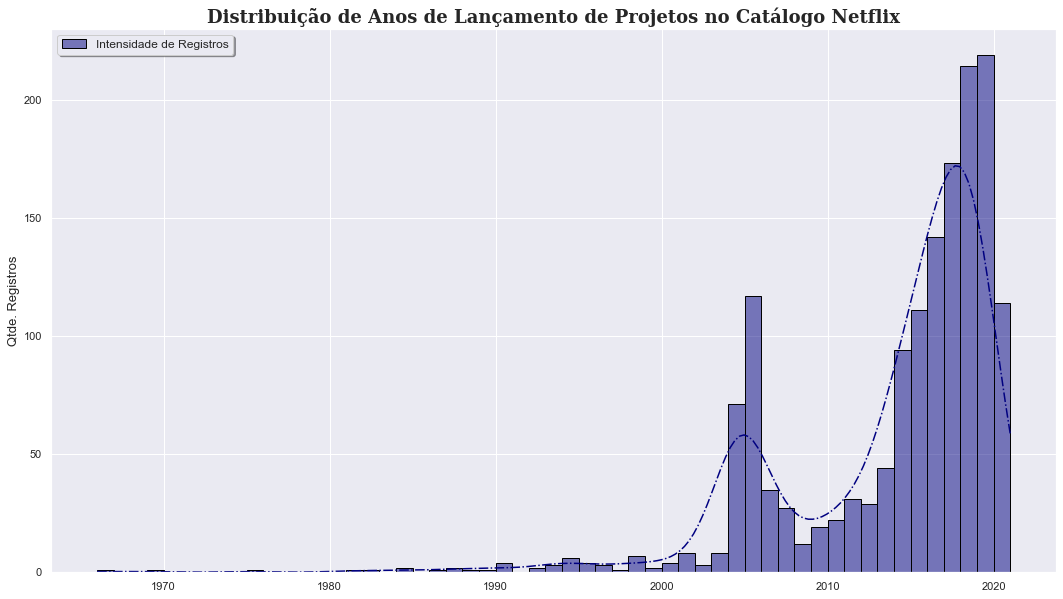

In [455]:
# Histograma
create_histogram(release_year_data, 
                 release_year_data['release_year'],
                 1.0,
                 'Distribuição de Anos de Lançamento de Projetos no Catálogo Netflix')

Os dados tendem a direita de maneira expressiva, onde a quantidade de projetos produzidos a partir de 2000 tem um pico por volta de 2005, onde tem outra queda por volta de 2010 e cresce vertiginosamente após esse período. Ou seja, a maior parte dos projetos no catálogo Netflix foram lançados por volta de 2015 a 2020. 

Para outra visão da distribuição desses dados, vamos criar um boxplot:

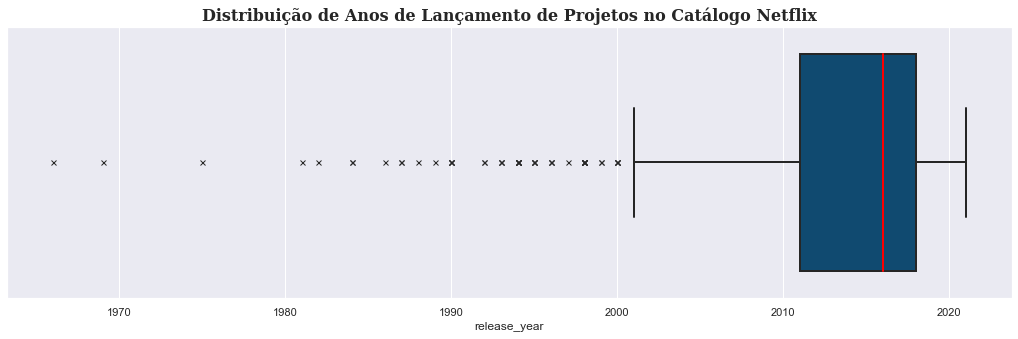

In [456]:
# Boxplot:
create_boxplot(release_year_data, release_year_data['release_year'], 
              'Distribuição de Anos de Lançamento de Projetos no Catálogo Netflix')

Com o Boxplot, temos uma visão mais precisa acerca da distribuição desses dados, onde:

- A linha mediana apresenta uma clara tendência a direita (limite superior) do boxplot, fator que já havia sido pontuado pelo Histograma;

- 50% dos dados (distâncias entre o primeiro e terceiro quantil representados pela caixa azul) estão entre o ano de 2010 e 2020;

- Como range inferior limítrofe, temos por volta de 2001 como marco, onde abaixo disso temos diversos valores discrepantes que vão até antes de 1970.

Isso exemplifica a variedade do catálogo de projetos presentes na Netflix, onde a maioria das obras foram criadas por entre 2011 e 2020 porém também se fazem presentes projetos tão antigos como 1970 e antes.

### **Histograma e Boxplot: ending_year**

In [457]:
# Selecionando dados diferentes de 0:
ending_year_data = data_clean.query('ending_year != 0')[['ending_year']]

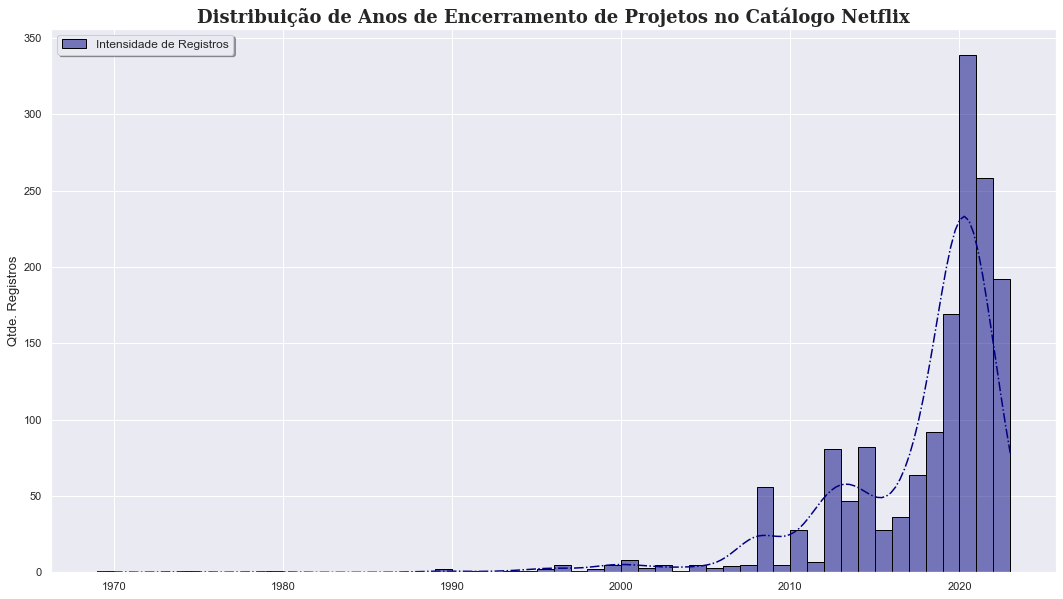

In [458]:
# Histograma:
create_histogram(ending_year_data, 
                 ending_year_data['ending_year'], 
                 1.0,
                 'Distribuição de Anos de Encerramento de Projetos no Catálogo Netflix')

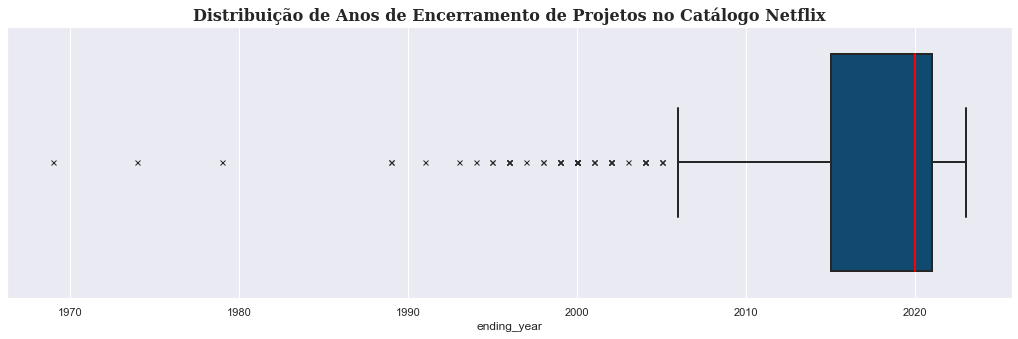

In [459]:
# Boxplot:
create_boxplot(ending_year_data, 
               ending_year_data['ending_year'], 
               'Distribuição de Anos de Encerramento de Projetos no Catálogo Netflix')

Como apontam o Histograma e o Boxplot, curiosamente o ano de encerramento mais comum é o mesmo ano de lançamento mais comum, 2020. Isso pode indicar algumas coisas:

- Lançamentos de mini-séries que se iniciam e terminam no mesmo ano;

- É válido considerar a [pandemia de Covid-19 e seus impactos na indústria do cinema](https://www.vet.k-state.edu/about/news-events-publications/OneHealth/Vol14-Iss1/film-industry.html#:~:text=As%20a%20result%20of%20the,produced%20in%202021%20or%202022.), onde muitas produções de filmes e séries foram canceladas/encerradas abruptamente ou postergadas para anos seguintes durante 2020, o que pode compor uma explicação para tantos encerramentos em 2020. 

Vamos checar alguns desses registros que constam data de encerramento maiores que 2022:

In [460]:
# checando  entradas acima de 2022:
data_clean.query('ending_year > 2022').head(10)

,title,release_year,ending_year,certificate,duration_min,genre,rating,stars,votes
39,The Umbrella Academy,2019,2023,TV-14,60,"Action, Adventure, Comedy",7.9,"['Elliot Page, ', 'Tom Hopper, ', 'David Casta...",243344
49,Never Have I Ever,2020,2023,TV-14,30,"Comedy, Drama",7.9,"['Maitreyi Ramakrishnan, ', 'Poorna Jagannatha...",56216
50,Attack on Titan,2013,2023,TV-MA,24,"Animation, Action, Adventure",9.0,"['Josh Grelle, ', 'Yûki Kaji, ', 'Yui Ishikawa...",363297
87,The Flash,2014,2023,TV-PG,43,"Action, Adventure, Drama",7.6,"['Grant Gustin, ', 'Candice Patton, ', 'Daniel...",344187
258,Snowpiercer,2020,2023,TV-MA,60,"Action, Drama, Sci-Fi",6.9,"['Daveed Diggs, ', 'Mickey Sumner, ', 'Alison ...",54342
335,Workin' Moms,2017,2023,TV-MA,30,"Comedy, Drama",7.8,"['Catherine Reitman, ', 'Dani Kind, ', 'Philip...",17710
8300,The Umbrella Academy,2019,2023,TV-14,47,"Action, Adventure, Comedy",8.2,"['Sylvain White', '| ', ' Stars:', 'Elliot ...",4357
8323,The Umbrella Academy,2019,2023,TV-14,48,"Action, Adventure, Comedy",8.0,"['Stephen Surjik', '| ', ' Stars:', 'Elliot...",3879
8360,Never Have I Ever,2020,2023,TV-14,28,"Comedy, Drama",7.4,"['Tristram Shapeero', '| ', ' Stars:', 'Mai...",1168
8361,Never Have I Ever,2020,2023,TV-14,29,"Comedy, Drama",7.5,"['Tristram Shapeero', '| ', ' Stars:', 'Mai...",1037


- São programas já estabelecidos que possuem um ano previsto para finalização (a série **_The Umbrella Academy_** como exemplificado acima com 3 episódios aparecendo na sample), nesse caso iremos deixá-los na análise justamente por possuirem dados relevantes (minutagem, rating e votos).

### **Histograma e Boxplot: duration_min**

In [461]:
# Selecionando dados diferentes de 0:
duration_data = data_clean.query('duration_min != 0')[['duration_min']]

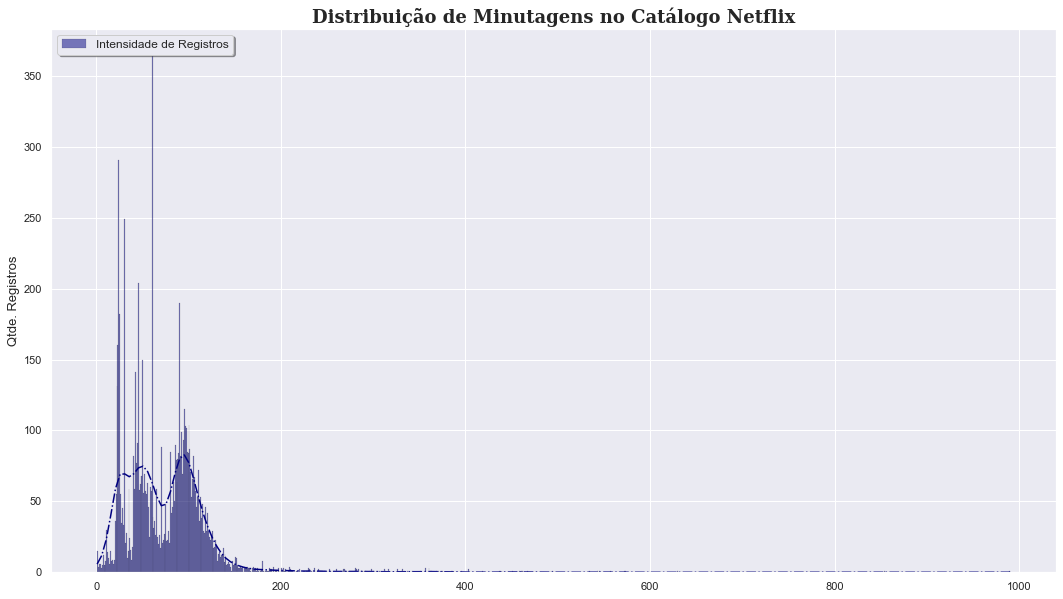

In [462]:
# Histograma:
create_histogram(duration_data, 
                 duration_data['duration_min'],
                 1.0, 
                 'Distribuição de Minutagens no Catálogo Netflix')

Somente com o histograma é aparente a distribuição não adequada da coluna de minutagem, onde a grande maioria dos dados estão abaixo de por volta 150 a 200 minutos porém o eixo X vai até 1000.

Com o boxplot, iremos visualizar quantos desses registros estão acima de 200 minutos:

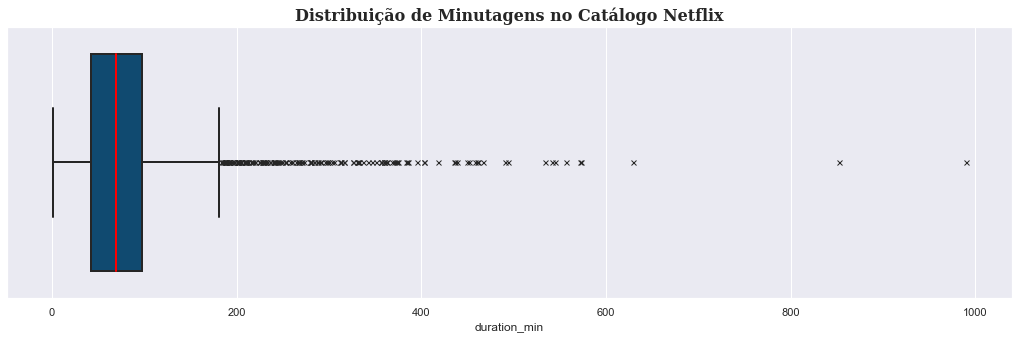

In [463]:
create_boxplot(duration_data, 
               duration_data['duration_min'], 
               'Distribuição de Minutagens no Catálogo Netflix')

É aparente que temos outliers nessa coluna, porém, para termos uma compreensão melhor do que são esses registros com minutagens tão extensas, vamos puxar um sample do DataFrame para visualização:

In [464]:
# Checando entradas acima de 175 minutos:
data_clean.query('duration_min > 200').head(10)

,title,release_year,ending_year,certificate,duration_min,genre,rating,stars,votes
3,Devil in Ohio,0,0,TV-MA,356,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773
30,Echoes,0,0,TV-MA,326,"Drama, Mystery, Thriller",5.9,"['Michelle Monaghan, ', 'Matt Bomer, ', 'Karen...",9380
57,The Lord of the Rings: The Return of the King,0,0,PG-13,201,"Action, Adventure, Drama",9.0,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157
89,Dahmer - Monster: The Jeffrey Dahmer Story,0,0,TV-MA,534,"Biography, Crime, Drama",8.5,"['Evan Peters, ', 'Richard Jenkins, ', 'Molly ...",5580
143,The Haunting of Hill House,0,0,TV-MA,572,"Drama, Horror, Mystery",8.6,"['Michiel Huisman, ', 'Carla Gugino, ', 'Henry...",237198
155,Midnight Mass,0,0,TV-MA,450,"Drama, Fantasy, Horror",7.7,"['Kate Siegel, ', 'Zach Gilford, ', 'Kristin L...",110997
212,Anatomy of a Scandal,0,0,TV-MA,268,"Drama, Thriller",7.0,"['Sienna Miller, ', 'Rupert Friend, ', 'Michel...",27590
227,Maid,0,0,TV-MA,545,Drama,8.4,"['Margaret Qualley, ', 'Nick Robinson, ', 'Ryl...",81102
250,Dracula,0,0,TV-14,270,"Action, Drama, Fantasy",6.8,"['Claes Bang, ', 'Dolly Wells, ', 'Morfydd Cla...",47794
262,The Haunting of Bly Manor,0,0,TV-MA,494,"Drama, Horror, Mystery",7.3,"['Victoria Pedretti, ', 'Oliver Jackson-Cohen,...",101853


- Os registros aparentam ser séries cujas inserções no banco de dados ocorreram de uma vez só em um único registro, causando com que a minutagem fosse o acumulado de todas as minutagens dos episódios das séries, como exemplo a série Dahmer, que possui multiplos episódios e nesse caso, sua minutagem aparenta ser a soma de todos esses episódios condensados em um só registro.

- Além de séries temos alguns longas metragem como Lord Of The Rings e RRR;

Pretendemos remover todos os registros acima de 201 minutos dos dados devido a sua alta volatidade e aleatoriedade, 201 minutos em específico para podermos manter nos dados o filme mais longo da saga The Lord Of The Rings, pois é um projeto importante nos dados com muitos votos para ser descartado.

In [465]:
data_clean.loc[(data_clean.title.str.contains('Rings')), :]

,title,release_year,ending_year,certificate,duration_min,genre,rating,stars,votes
20,The Lord of the Rings: The Fellowship of the Ring,0,0,PG-13,178,"Action, Adventure, Drama",8.8,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844055
57,The Lord of the Rings: The Return of the King,0,0,PG-13,201,"Action, Adventure, Drama",9.0,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157
78,The Lord of the Rings: The Two Towers,0,0,PG-13,179,"Action, Adventure, Drama",8.8,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708
9921,The Lord of the Rings: The Fellowship of the Ring,0,0,PG-13,178,"Action, Adventure, Drama",8.8,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075


In [466]:
# Retirando dados acima de 202 minutos:
data_clean = data_clean.drop(data_clean.query('duration_min > 201').index)

In [467]:
# Shape final do Dataset:
data_clean.shape

(8640, 9)

### **Histograma e Boxplot: rating**

In [468]:
# Selecionando dados diferentes de 0:
rating_data = data_clean.query('rating != 0')[['rating']]

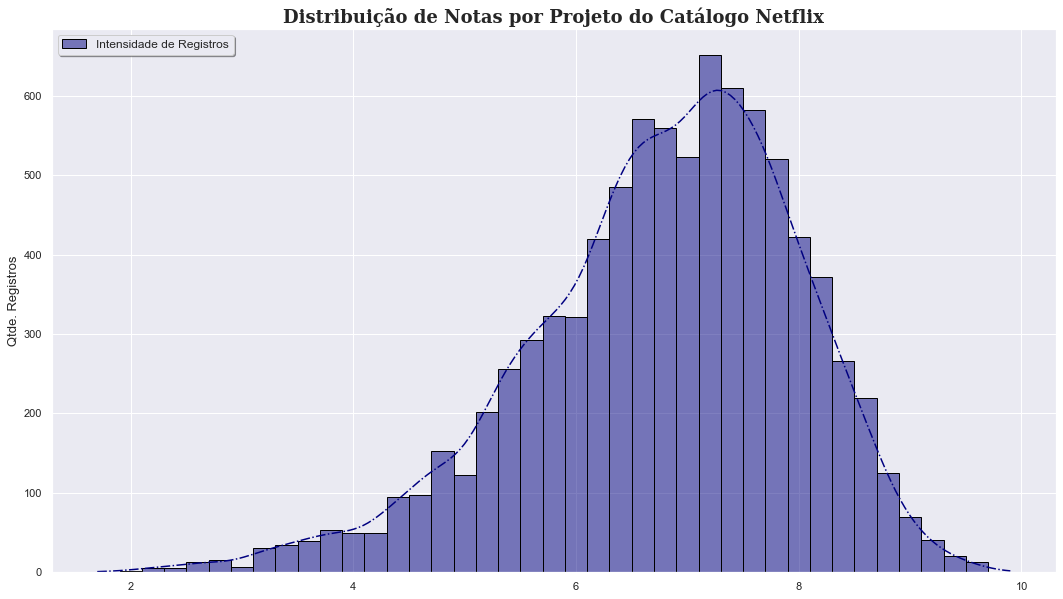

In [469]:
# Histograma:
create_histogram(rating_data, 
                 rating_data['rating'],
                 0.2, 
                'Distribuição de Notas por Projeto do Catálogo Netflix')

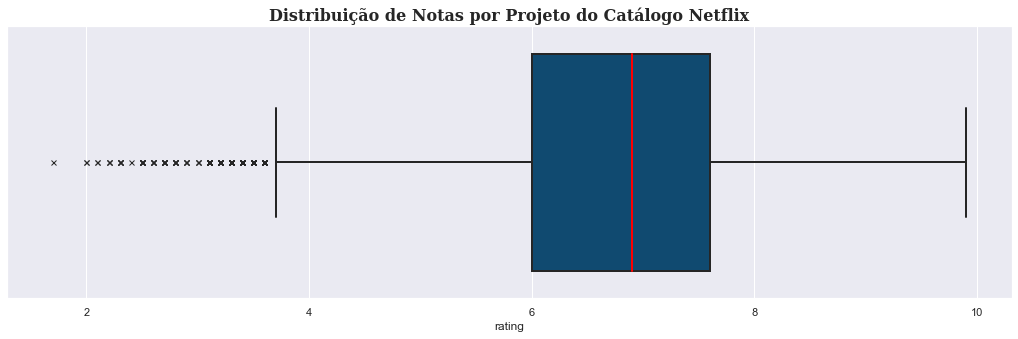

In [470]:
# Boxplot:
create_boxplot(rating_data, 
               rating_data['rating'], 
               'Distribuição de Notas por Projeto do Catálogo Netflix')

Aqui podemos ter uma visualização melhor dos dados da coluna rating, onde a maioria das obras receberam uma avaliação de por volta 7, tendo alguns registos abaixo de 4 e um abaixo de 2.

Com o Histograma, podemos ver que os dados estão distribuidos de forma homogênia com uma tendência a direita.

### **Histograma e Boxplot: votes**

Como dito nas primeiras checagens da coluna votes, pela quantidade massiva de votos dados para cada projeto, a visualização do Histograma dessa coluna será feita em escala logarítimica para melhor visualização, por isso, não iremos chamar nossa função de criação de plots, mas iremos realizar a plotagem manualmente.

In [471]:
# Selecionando dados diferentes de 0:
votes_data = data_clean.query('votes != 0')[['votes']]

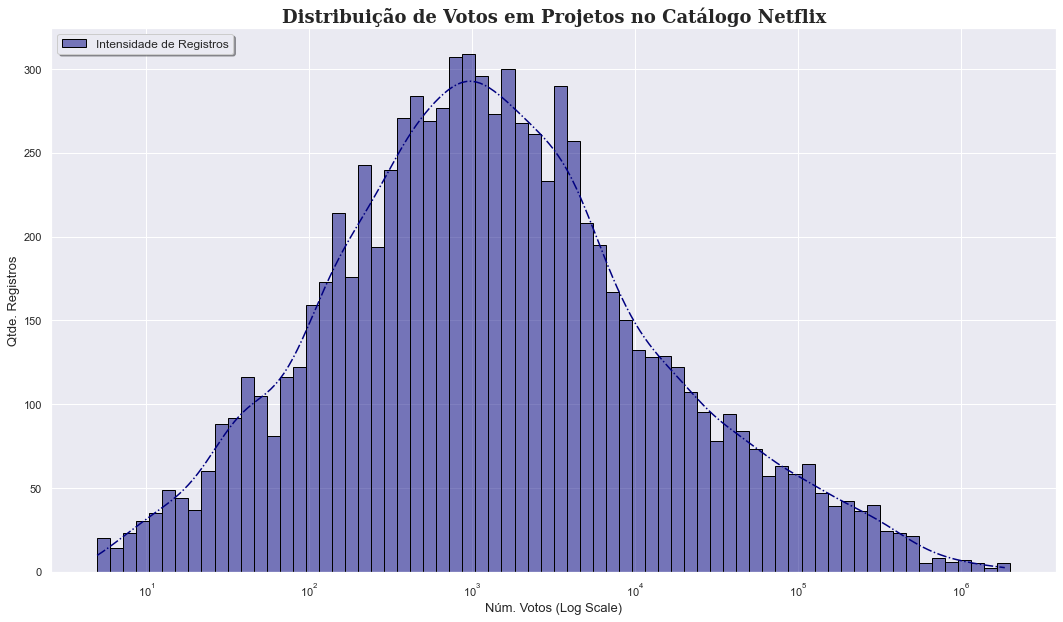

In [472]:
# Histograma:
fig, ax = plt.subplots(figsize=(18, 10))

sns.histplot(data=votes_data, x='votes', kde=True, 
             label='Intensidade de Registros', 
             binwidth=0.08, edgecolor='black',
             line_kws={'linestyle':'dashdot'},
             color='navy', log_scale=True)

plt.title('Distribuição de Votos em Projetos no Catálogo Netflix', 
           fontdict={'size': 18, 
                     'weight': 'bold', 
                     'family': 'serif'})

plt.ylabel('Qtde. Registros', fontsize=13)

plt.xlabel('Núm. Votos (Log Scale)', fontsize=13)

plt.legend(loc='upper left', fontsize=12, 
           fancybox=True, shadow=True)

plt.show()

Aqui temos o inverso do visualizado no histograma da coluna rating, uma distribuição homogênia dos dados que tende levemente a esquerda.

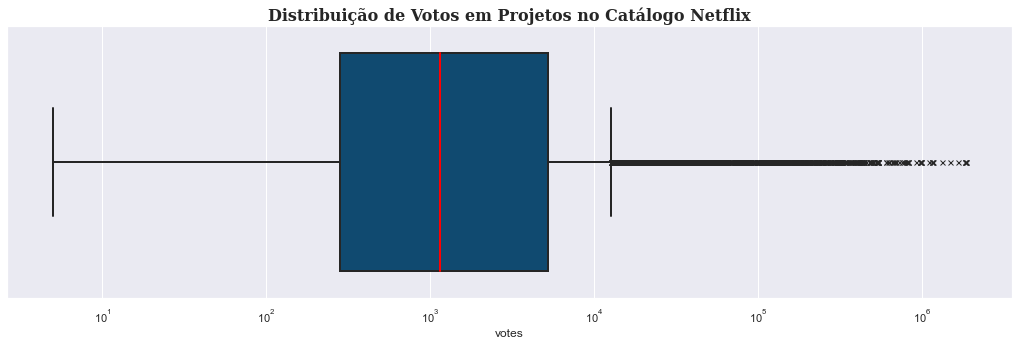

In [473]:
# Boxplot:
fig, ax = plt.subplots(figsize=(18, 5))

sns.boxplot(data=votes_data, x='votes',
            flierprops={"marker": "x"}, 
            medianprops={"color": "red"}, 
            color='#004d80', linewidth=2)

ax.set_xscale('log')

plt.title('Distribuição de Votos em Projetos no Catálogo Netflix', 
           loc='center', fontdict={'size': 16, 
                                   'weight': 'bold', 
                                   'family': 'serif'})

plt.show()

A tendência a esquerda dos dados pode ser bem visualizada com o boxplot, onde alguns outliers estão mais a direita.

Com os dados limpos e organizados, podemos dar início as nossas análises.

# <font color='gold'>**_Perguntas, Insights e Plots_**</font> 📉

Com os dados devidamente limpos e organizados, nos debruçaremos sobre algumas análises pertinentes ao Dataset, sendo essas análises compostas pelas perguntas e postulações:

- **1.** Qual a quantidade de obras por certificado?

- **2.** Contabilizar a quantidade de projetos lançados por década;

- **3.** Quais os top 10 gêneros e quantas vezes aparecem nos registros?

- **4.** Qual a média de tempo de duração dos filmes por top 10 gêneros?

- **5.** Qual a média de ratings dadas aos projetos por top 10 gêneros?

- **6.** Quais são os programas mais bem avaliados no geral?

- **7.** Existe alguma correlação relevante apontada pelos dados?

Todas as questões serão analisadas e respondidas duas vezes, uma para cada DataFrame de minutagem.

### 1. Qual a quantidade de obras por certificado?

#### Resposta 1: df_movies_clean

In [474]:
# Coletando cada registro de cada certificado e passando esses valores para um novo DataFrame:
df_certs_clean = pd.DataFrame(
    df_movies_clean['certificate'].value_counts()
    )

# Resetando o index dos registros no novo DataFrame e renomeando as colunas novas:
df_certs_clean = df_certs_clean.reset_index()
df_certs_clean = df_certs_clean.rename(
    columns={'index':'certificate_type', 'certificate':'quantity'}
    )

# Visualizando top 5 resultados:
df_certs_clean.head()

NameError: name 'df_movies_clean' is not defined

Assim, temos os top 5 tipos de certificações dadas as obras com minutagem menor a 175, sendo:

- 3399 registros o maior valor, onde essas obras não tiveram sua certificação informada no Dataset. Lembrando que isso não significa que essas obras não retiraram certificação ou não foram aplicáveis (como constam obras com certificação 'Not Rated/Unrated'), apenas significa que essa informação não foi inserida, por motivos desconhecidos.

Dentre certificações que podemos determinar, a de maior atribuição foi **TV-MA**, seguida de **TV-14** e **TV-PG** respectivamente, o que indica que a maioria das produções presentes no catálogo Netflix cujas minutagens estão abaixo dos 175 minutos são pensadas para audiências maturas.

Para facilitar a visualização e podermos enxergar toda a dimensão dos dados tabulares, plotaremos um gráfico com base nesses dados:

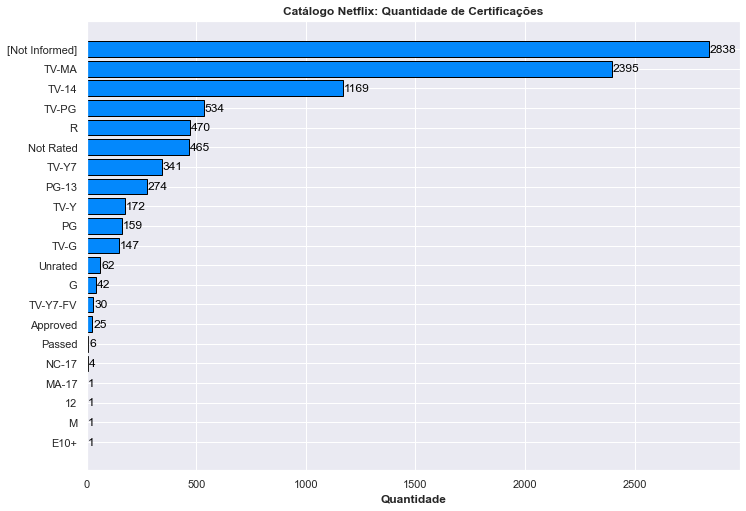

In [ ]:
# Bar Chart

# Definindo as variáveis que contém o tipo de certificação e a quantidade respectivamente:
certificates = list(df_certs_clean['certificate_type'])
quantity = list(df_certs_clean['quantity'])

# Plotando
fig, ax = plt.subplots()

hbars = ax.barh(
    certificates, 
    quantity, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )

ax.set_yticks(certificates)
ax.invert_yaxis()
ax.set_xlabel('Quantidade',fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Quantidade de Certificações', fontsize=12, fontweight='bold')

ax.bar_label(hbars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

#### Resposta 2: df_long_duration

In [ ]:
# Coletando cada registro de cada certificado e passando esses valores para um novo DataFrame:
df_certs_long = pd.DataFrame(
    df_long_duration['certificate'].value_counts()
    )

# Resetando o index dos registros no novo DataFrame e renomeando as colunas novas:
df_certs_long = df_certs_long.reset_index()
df_certs_long = df_certs_long.rename(
    columns={'index':'certificate_type', 'certificate':'quantity'}
    )

# Visualizando top 5 resultados:
df_certs_long.head()

,certificate_type,quantity
0,TV-MA,106
1,TV-14,27
2,[Not Informed],16
3,PG-13,8
4,TV-PG,7


Aqui já notamos uma diferença em relação aos projetos de minutagem mais curta. O maior número de certificações pertencem a **TV-MA** com 106 registros, seguida por **TV-14** e **Not Informed** respectivamente.

A quantidade de certificações para audiências maduras (TV-MA) ser cerca de 4X maior do que o segundo registro mais presente (TV-14), demonstra que obras de maior duração tendem a serem destinadas para o público adulto.

Uma plotagem gráfica novamente será realizada para melhor visualização dos dados:

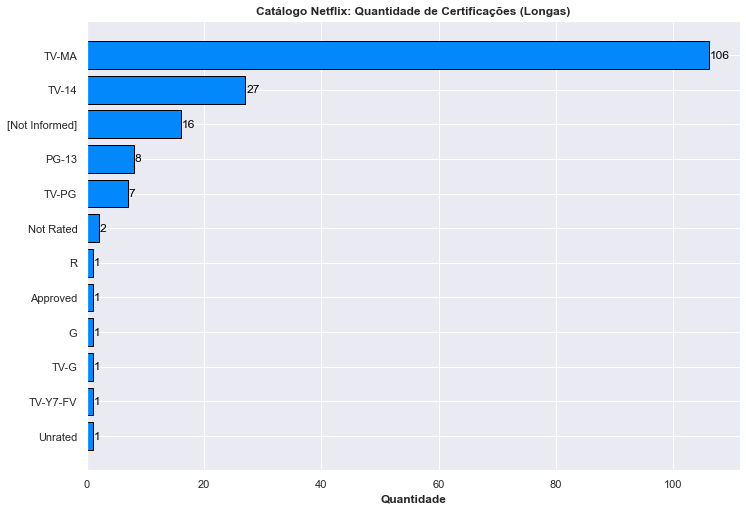

In [ ]:
# Bar Chart

# Definindo as variáveis que contém o tipo de certificação e a quantidade respectivamente:
certs_long = list(df_certs_long['certificate_type'])
qnty_long = list(df_certs_long['quantity'])

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    certs_long, 
    qnty_long, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )

ax.set_yticks(certs_long)
ax.invert_yaxis()
ax.set_xlabel('Quantidade',fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Quantidade de Certificações (Longas)', fontsize=12, fontweight='bold')

ax.bar_label(hbars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

### 2. Contabilizar a quantidade de projetos lançados por década

#### Resposta 1: df_movies_clean

In [ ]:
# Primeiramente, precisamos pegar todos os registros de cada ano de lançamento
# e passar esses valores para um novo DataFrame:
df_release_clean = pd.DataFrame(df_movies_clean.loc[
    (df_movies_clean['release_year'] != 0), ['release_year']
].value_counts())

# Resetando os índices do novo DataFrame:
df_release_clean = df_release_clean.reset_index()

# Renomeando colunas:
df_release_clean = df_release_clean.rename(columns={0:'quantity'})

# Visualizando resultados:
df_release_clean.head()

,release_year,quantity
0,2019,1299
1,2020,1179
2,2018,1000
3,2021,863
4,2017,799


Para podermos ter conhecimento de quantos projetos foram lançados por década, iremos utilizar cortes de dez anos no Dataset, para isso no entanto, primeiro precisamos saber os anos máximo e mínimo presentes nos dados:

In [ ]:
# Identificando os anos máximo e mínimo presentes:
max_year = df_release_clean['release_year'].max()
min_year = df_release_clean['release_year'].min()

print(f'Ano máximo: {max_year}')
print(f'Ano mínimo: {min_year}')

Ano máximo: 2022
Ano mínimo: 1932


Com isso vemos que temos um range de 90 anos de registros. Sendo assim, realizaremos um corte de 9 décadas para podermos visualizar o número de projetos lançados:

In [ ]:
# Fatiando o DataFrame por década:
release_decades = pd.cut(df_release_clean['release_year'], bins=9, labels=[
    '1932-1942',
    '1942-1952', 
    '1952-1962', 
    '1962-1972', 
    '1972-1982', 
    '1982-1992', 
    '1992-2002', 
    '2002-2012', 
    '2012-2022'
])

In [ ]:
# Inserindo esse recorte no DataFrame como uma nova coluna informando a década em que
# o projeto foi lançado:
df_release_clean['release_decade'] = release_decades

# Checando resultados:
df_release_clean.sample(5)

,release_year,quantity,release_decade
58,1962,3,1952-1962
68,1972,2,1962-1972
73,1963,1,1962-1972
70,1958,2,1952-1962
62,1953,3,1952-1962


Agora, basta agrupar os dados pelas décadas e plotar um gráfico demonstrando quantos projetos foram lançados por década:

In [ ]:
# Agrupando dados por décadas:
decades = df_release_clean['release_decade'].value_counts().sort_values()

# Visualizando resultados:
decades

1932-1942     6
1942-1952     7
1952-1962    10
1962-1972    10
1972-1982    10
1982-1992    10
1992-2002    10
2002-2012    10
2012-2022    10
Name: release_decade, dtype: int64

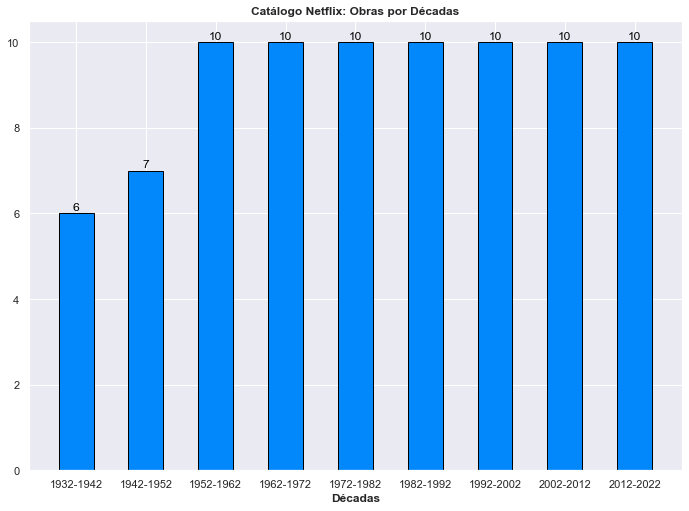

In [ ]:
# Bar Chart

# Plotando:
fig, ax = plt.subplots()

bars = ax.bar(
    decades.index, 
    align='center', 
    edgecolor='black', 
    color='#0388fc', 
    height=decades, 
    width=.5
    )
    
ax.set_xlabel('Décadas',fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Obras por Décadas', fontsize=12, fontweight='bold')

ax.bar_label(bars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

No catálogo da Netflix temos 10 projetos de cada década, menos das entre 1932 a 1952.

#### Resposta 2: df_long_duration

Similarmente ao processo executado na resposta 1, vamos pegar os anos de lançamento de cada projeto, identificar os intervalos de décadas, realizar o corte no DataFrame e plotar os resultados.

In [ ]:
# Coletando registros:
df_release_long = pd.DataFrame(df_long_duration.loc[
    (df_long_duration['release_year'] != 0), ['release_year']
    ].value_counts())

# Resetando index:
df_release_long = df_release_long.reset_index()

# Renomeando coluna e vendo resultados:
df_release_long = df_release_long.rename(
    columns={0:'quantity'}
    )
df_release_long.head()

,release_year,quantity
0,2021,33
1,2020,31
2,2022,30
3,2019,18
4,2018,15


Agora, vamos para a identificação dos anos máximo e mínimo e para os recortes de décadas:

In [ ]:
# Identificando os anos máximo e mínimo presentes:
max_year = df_release_long['release_year'].max()
min_year = df_release_long['release_year'].min()

print(f'Ano máximo: {max_year}')
print(f'Ano mínimo: {min_year}')

Ano máximo: 2022
Ano mínimo: 1956


São 66 anos de registros, sendo assim, será uma divisão de 6 décadas:

In [ ]:
# Cortando o DataFrame:
release_decades_long = pd.cut(df_release_long['release_year'], bins=6, labels=[
    '1956-1967',
    '1967-1978',
    '1978-1989', 
    '1989-2000', 
    '2000-2011', 
    '2011-2022'])

# Inserindo os cortes no DataFrame:
df_release_long['release_decade'] = release_decades_long

# Visualizando resultados:
df_release_long.sample(5)

,release_year,quantity,release_decade
1,2020,31,2011-2022
25,2010,1,2000-2011
12,2015,1,2011-2022
9,2001,3,2000-2011
5,2017,10,2011-2022


In [ ]:
# Agrupando por década de lançamento:
long_decades = df_release_long['release_decade'].value_counts().sort_values()

# Checando resultados:
long_decades

1978-1989     0
1967-1978     1
1956-1967     3
1989-2000     5
2000-2011     6
2011-2022    11
Name: release_decade, dtype: int64

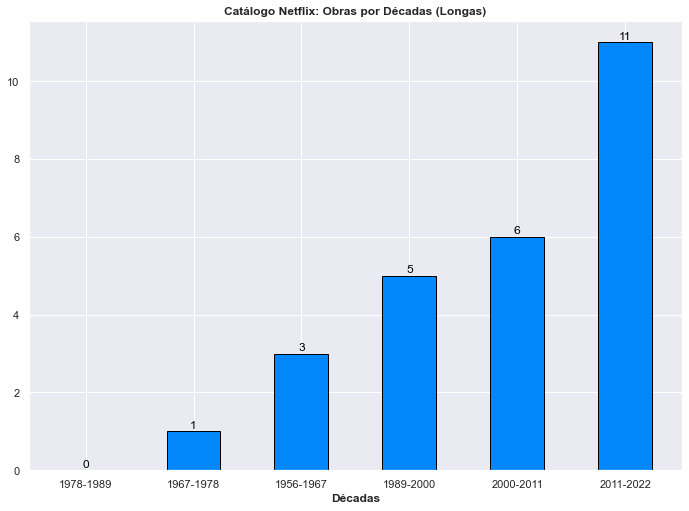

In [ ]:
# Bar Chart

# Plotando:
fig, ax = plt.subplots()

bars = ax.bar(
    long_decades.index, 
    align='center', 
    edgecolor='black', 
    color='#0388fc', 
    height=long_decades, 
    width=.5
    )

ax.set_xlabel('Décadas',fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Obras por Décadas (Longas)', fontsize=12, fontweight='bold')

ax.bar_label(bars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

Podemos notar um crescimento no número de produções disponíveis no catálogo Netflix quanto mais recente a década, sendo a década de 2011 até 2022 a que possuí mais obras disponíveis.

### 3. Quais os top 10 gêneros e quantas vezes aparecem nos registros?

#### Resposta 1: df_movies_clean

In [ ]:
# Primeiramente, pegaremos os registros dos gêneros das top 10 obras e criar um novo DataFrame:
df_genre_clean = pd.DataFrame(
    df_movies_clean['genre'].value_counts().head(10)
    )

# Resetamos o index:
df_genre_clean = df_genre_clean.reset_index()

# Renomeando colunas:
df_genre_clean = df_genre_clean.rename(
    columns={'index':'genre', 'genre':'quantity'}
    )

# Checando resultados:
df_genre_clean

,genre,quantity
0,Comedy,803
1,"Animation, Action, Adventure",523
2,Drama,506
3,Documentary,485
4,"Comedy, Drama",277
5,"Crime, Drama, Mystery",234
6,"Drama, Romance",234
7,"Comedy, Drama, Romance",204
8,Reality-TV,187
9,"Action, Crime, Drama",166


O gênero mais presente no catálogo Netflix é Comédia, seguido por Animações de Ação e Aventura.

Comédia aparece com uma expressão grande em relação aos outros títulos, tendo mais de 200 projetos de diferença com o segundo maior gênero.

Isso pode ser identificado como resultado das ações da Netflix que adiquiriram muitos direitos autorais de Comedy Specials de diversos comediantes, tantos brasileiros quanto estrangeiros e os colocou em sua plataforma como exclusivos.

Para melhor visualização, vamos plotar um gráfico:

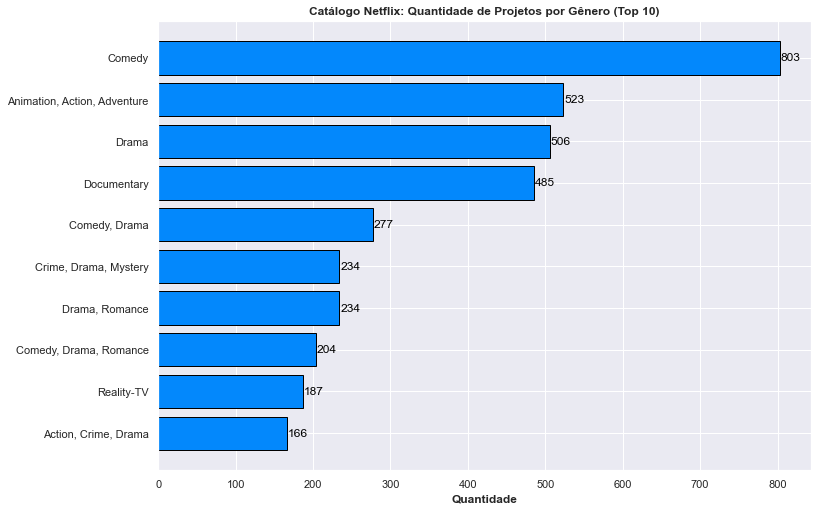

In [ ]:
# Bar Chart

# Plotando:
genres = list(df_genre_clean['genre'])
values = list(df_genre_clean['quantity'])

fig, ax = plt.subplots()

hbars = ax.barh(
    genres, 
    values, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )
    
ax.set_yticks(genres)
ax.invert_yaxis()
ax.set_xlabel('Quantidade', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Quantidade de Projetos por Gênero (Top 10)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

#### Resposta 2: df_long_duration

In [ ]:
# Primeiramente, pegaremos os registros dos gêneros das top 10 obras e criar um novo DataFrame:
df_genre_long = pd.DataFrame(
    df_long_duration['genre'].value_counts().head(10)
    )

# Resetamos o index:
df_genre_long = df_genre_long.reset_index()

# Renomeando colunas:
df_genre_long = df_genre_long.rename(
    columns={'index':'genre', 'genre':'quantity'}
    )

# Checando resultados:
df_genre_long

,genre,quantity
0,"Documentary, Crime",23
1,Documentary,12
2,"Crime, Drama, Mystery",11
3,"Action, Adventure, Drama",6
4,"Crime, Drama",6
5,"Biography, Crime, Drama",6
6,"Drama, Horror, Mystery",5
7,Drama,5
8,"Drama, Mystery, Thriller",5
9,"Documentary, Crime, Mystery",5


Documentários sobre Crimes são o tipo de gênero mais comum entre os longas, isso pode ser sintoma da crescente aparente em conteúdos True Crime na cultura popular, tendo séries como Jeffrey Dahmer como exemplo mais recente de um sucesso 'complicado' desse tipo de conteúdo.

Outro ponto interessante, são os tipos dos gêneros dos longas, tendo uma aparente têndencia a serem mais pesados/maduros em seus temas. Tópicos como Crime, Drama e Mystery são muito recorrentes nos dados, apenas reforçando a ideia de que obras de longa duração são destinadas primordialmente para públicos adultos.

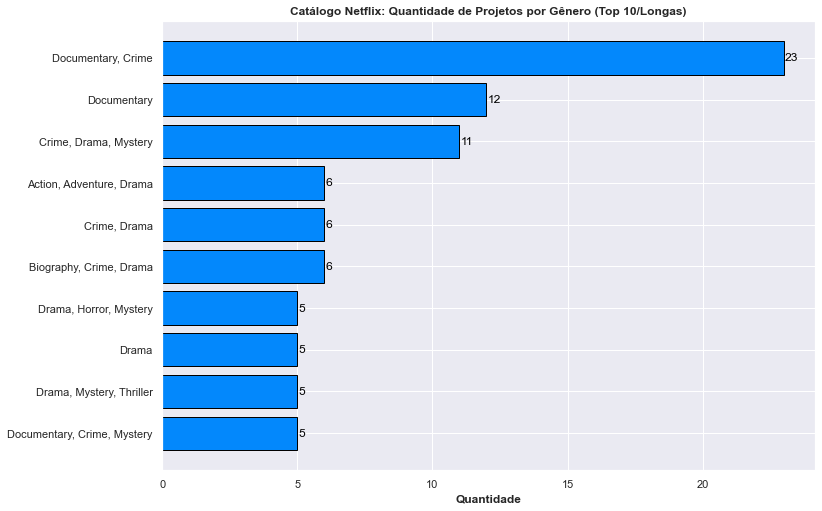

In [ ]:
# Bar Chart

# Plotando:
genres_long = list(df_genre_long['genre'])
values_long = list(df_genre_long['quantity'])

fig, ax = plt.subplots()

hbars = ax.barh(
    genres_long, 
    values_long, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )
    
ax.set_yticks(genres_long)
ax.invert_yaxis()
ax.set_xlabel('Quantidade', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Quantidade de Projetos por Gênero (Top 10/Longas)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

### 4. Qual a média de tempo de duração dos projetos por top 10 gêneros?

Para podermos analisar a média de tempo de duração dos projetos por top 10 gêneros, primeiro precisamos definir esses top 10 gêneros em uma variável:

#### Resposta 1: df_movies_clean

In [ ]:
# Definindo top 10 gêneros para uma variável:
top_genres = df_movies_clean['genre'].value_counts().head(10)

# Visualizando:
top_genres

Comedy                          803
Animation, Action, Adventure    523
Drama                           506
Documentary                     485
Comedy, Drama                   277
Crime, Drama, Mystery           234
Drama, Romance                  234
Comedy, Drama, Romance          204
Reality-TV                      187
Action, Crime, Drama            166
Name: genre, dtype: int64

Para que a manipulação seja mais fácil, essa variável será trasformada em uma lista:

In [ ]:
# Passando dados para uma lista:
genres_list = list(top_genres.index)

# Visualizando:
genres_list

['Comedy',
 'Animation, Action, Adventure',
 'Drama',
 'Documentary',
 'Comedy, Drama',
 'Crime, Drama, Mystery',
 'Drama, Romance',
 'Comedy, Drama, Romance',
 'Reality-TV',
 'Action, Crime, Drama']

Agora que já temos os top 10 gêneros, precisamos coletar as minutagens desses gêneros específicos:

In [ ]:
# Coletando registros de minutagem dos materiais que estão no top 10 gêneros
genres_duration = df_movies_clean.loc[
    (df_movies_clean['genre'].isin(genres_list)),
    ['genre', 'duration_min']
]

# Visualizando novos dados:
genres_duration

,genre,duration_min
4,"Animation, Action, Adventure",24
11,"Action, Crime, Drama",89
13,"Crime, Drama, Mystery",139
14,Comedy,118
21,"Drama, Romance",41
...,...,...
9937,"Action, Crime, Drama",60
9939,"Comedy, Drama, Romance",22
9941,Comedy,118
9944,"Crime, Drama, Mystery",139


Agora que possuímos os dados que precisamos para responder a pergunta vamos arrumar o Dataset, começando pro agrupá-lo pela minutagem média:

In [ ]:
# Agrupando Dataset pelos gêneros e suas médias de tempo:
genres_duration = genres_duration.groupby('genre').mean()

# Visualizando:
genres_duration

,duration_min
genre,
"Action, Crime, Drama",79.391566
"Animation, Action, Adventure",27.189293
Comedy,58.215442
"Comedy, Drama",63.086643
"Comedy, Drama, Romance",63.039216
"Crime, Drama, Mystery",55.354701
Documentary,57.340206
Drama,66.266798
"Drama, Romance",70.008547


In [ ]:
# Dando unstack e resetando index no novo Dataset:
genres_duration = genres_duration.unstack().reset_index()

# Visualizando:
genres_duration

,level_0,genre,0
0,duration_min,"Action, Crime, Drama",79.391566
1,duration_min,"Animation, Action, Adventure",27.189293
2,duration_min,Comedy,58.215442
3,duration_min,"Comedy, Drama",63.086643
4,duration_min,"Comedy, Drama, Romance",63.039216
5,duration_min,"Crime, Drama, Mystery",55.354701
6,duration_min,Documentary,57.340206
7,duration_min,Drama,66.266798
8,duration_min,"Drama, Romance",70.008547
9,duration_min,Reality-TV,20.358289


In [ ]:
# Reorganizando colunas novas:
genres_duration = genres_duration.drop(
    'level_0', axis=1
    )
genres_duration = genres_duration.rename(
    columns={0:'duration_mean'}
    )

# Visualizando Dataset finalizado:
genres_duration

,genre,duration_mean
0,"Action, Crime, Drama",79.391566
1,"Animation, Action, Adventure",27.189293
2,Comedy,58.215442
3,"Comedy, Drama",63.086643
4,"Comedy, Drama, Romance",63.039216
5,"Crime, Drama, Mystery",55.354701
6,Documentary,57.340206
7,Drama,66.266798
8,"Drama, Romance",70.008547
9,Reality-TV,20.358289


Para uma visualização ideal, vamos plotar um gráfico com os dados:

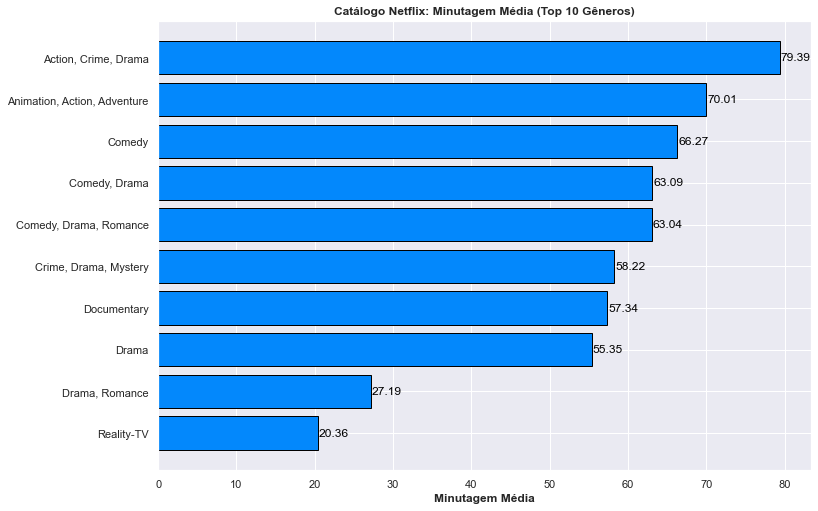

In [ ]:
# Bar Chart

# Pegando os dados e transformando-os em listas:
genres = list(genres_duration['genre'])
duration_time = list(genres_duration['duration_mean'].sort_values(ascending=False))

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    genres, 
    duration_time, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )
    
ax.set_yticks(genres)
ax.invert_yaxis()
ax.set_xlabel('Minutagem Média', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Minutagem Média (Top 10 Gêneros)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.2f', fontsize=12, color='#000000', padding=1)

plt.show()

Com o gráfico, podemos ver que os projetos de Ação, Crime e Drama são os que possuem a maior minutagem média, seguido por Animações de Ação e Aventura.

Um dado interessante é a minutagem média de projetos de Reality-TV, onde possuem apenas em média 20 minutos de duração. Na realidade, esse tipo de programação tem em torno de 30 minutos de duração, onde [uma parte desse tempo é tomado por intervalos comerciais](https://joneswriter.medium.com/how-long-should-tv-shows-be-the-rise-of-shorter-tv-6f23a83d572d) na TV.

Porém, como a Netflix não possuí intervalos comerciais no meio de episódios de seus projetos no catálogo, os programas de Reality-TV apresentam seu "verdadeiro" run-time de por volta de 20 minutos, como apontam os dados.

#### Resposta 2: df_long_movies

Para os projetos de longa duração, realizaremos o mesmo processo anterior para termos as informações necessárias:

In [ ]:
# Criando a variável com os top 10 gêneros de projetos longos:
top_genres_long = df_long_duration['genre'].value_counts().head(10)

# Passando esses dados para uma lista:
long_genres_list = list(top_genres_long.index)

# Visualizando:
long_genres_list

['Documentary, Crime',
 'Documentary',
 'Crime, Drama, Mystery',
 'Action, Adventure, Drama',
 'Crime, Drama',
 'Biography, Crime, Drama',
 'Drama, Horror, Mystery',
 'Drama',
 'Drama, Mystery, Thriller',
 'Documentary, Crime, Mystery']

In [ ]:
# Coletando registros de minutagem dos projetos contidos nesses gêneros:
long_genre_min = df_long_duration.loc[
    (df_long_duration['genre'].isin(genres_list)),
    ['genre', 'duration_min']
]

# Agrupando esses dados pela média do tempo por gênero:
long_genre_min = long_genre_min.groupby('genre').mean()

# Visualizando:
long_genre_min


,duration_min
genre,
"Action, Crime, Drama",405.000000
"Animation, Action, Adventure",218.500000
Comedy,216.250000
"Comedy, Drama",315.000000
"Crime, Drama, Mystery",342.636364
Documentary,300.500000
Drama,306.400000
"Drama, Romance",262.000000


Agora, basta organizarmos os dados e plotarmos o gráfico:

In [ ]:
# Realizando o unstack e reindexação do DataFrame:
long_genre_min = long_genre_min.unstack().reset_index()

# Reorganizando colunas:
long_genre_min = long_genre_min.drop(
    'level_0', axis=1
    )
long_genre_min = long_genre_min.rename(
    columns={0:'duration_mean'}
    )

# Visualizando:
long_genre_min

,genre,duration_mean
0,"Action, Crime, Drama",405.000000
1,"Animation, Action, Adventure",218.500000
2,Comedy,216.250000
3,"Comedy, Drama",315.000000
4,"Crime, Drama, Mystery",342.636364
5,Documentary,300.500000
6,Drama,306.400000
7,"Drama, Romance",262.000000


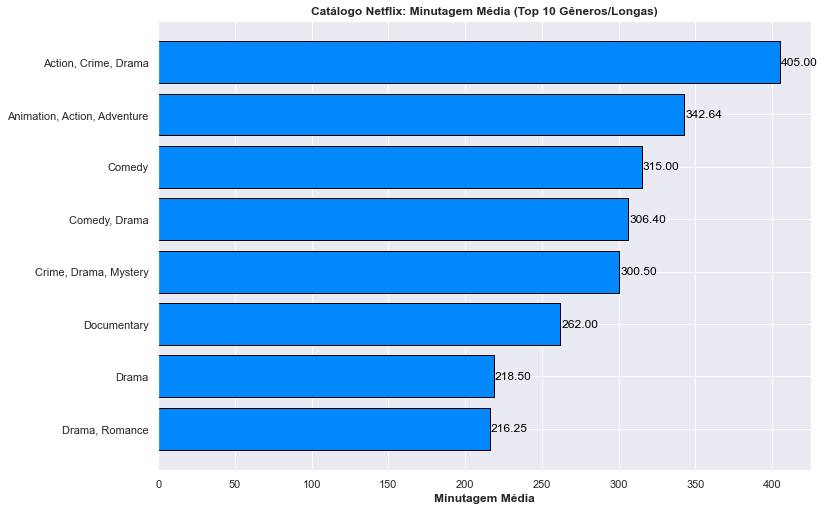

In [ ]:
# Bar Chart:

# Repassando so dados para listas:
long_genres = list(long_genre_min['genre'])
long_mean_time = list(long_genre_min['duration_mean'].sort_values(ascending=False))

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    long_genres, 
    long_mean_time, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )

ax.set_yticks(long_genres)
ax.invert_yaxis()
ax.set_xlabel('Minutagem Média', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Minutagem Média (Top 10 Gêneros/Longas)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.2f', fontsize=12, color='#000000', padding=1)

plt.show()

Como dito no início do projeto, esses dados podem ser inconsistentes pelo fato de alguns desses registros não serem um programa "contínuo" como um filme de longa-metragem ou um documentário, mas sim algumas séries que tiveram seus registros e suas minutagens "agregados" em uma única entrada no banco de dados.

Como forma de elucidar ainda mais esse ponto, vamos realizar uma query no banco de dados buscando por programas cuja minutagem é maior do que 500 minutos:

In [ ]:
df_long_duration.query('duration_min > 500').head(3)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
6,Dahmer - Monster: The Jeffrey Dahmer Story,2022,0,TV-MA,534,"Biography, Crime, Drama",8.5,Story of the Milwaukee Monster told from the p...,"['Evan Peters, ', 'Richard Jenkins, ', 'Molly ...",5580
8,The Haunting of Hill House,2018,0,TV-MA,572,"Drama, Horror, Mystery",8.6,"Flashing between past and present, a fractured...","['Michiel Huisman, ', 'Carla Gugino, ', 'Henry...",237198
11,Maid,2021,0,TV-MA,545,Drama,8.4,"After fleeing an abusive relationship, a young...","['Margaret Qualley, ', 'Nick Robinson, ', 'Ryl...",81102


Como exemplo, em primeiro lugar temos a nova série contoversa da Netflix sobre Jeffrey Dahmer que possuí uma temporada até o momento presente.

De acordo com os dados, a duração completa desse projeto é de 534 minutos, o que é a demonstração do comentado acima, de que algumas séries foram inseridas no banco de dados como um único registro, enquanto outras tiveram cada episódio lançado independentemente no Dataset.

Com isso em mente, essas análises acerca dos programas longos devem ser interpretadas com cautela, pois os dados não são 100% integros.

### 5. Qual a média de ratings dadas aos projetos por top 10 gêneros?

Outra métrica interessante de ser observada é a media de avaliações que os projetos presentes nos top 10 gêneros do catálogo Netflix receberam.

#### Resposta 1: df_movies_clean

In [ ]:
# Redefinindo os top 10 gêneros:
movies_genres = df_movies_clean['genre'].value_counts().head(10)

# Passando para uma lista:
genres_list = list(movies_genres.index)

# Coletando as avaliações dadas aos projetos presentes nesses gêneros:
top_genres = df_movies_clean.loc[
    (df_movies_clean['genre'].isin(genres_list)),
    ['genre', 'rating']
]

# Reagrupando:
top_genres = top_genres.groupby('genre').mean()

# Visualizando:
top_genres

,rating
genre,
"Action, Crime, Drama",6.383735
"Animation, Action, Adventure",7.374570
Comedy,6.105729
"Comedy, Drama",6.789892
"Comedy, Drama, Romance",6.509804
"Crime, Drama, Mystery",7.406838
Documentary,6.520825
Drama,6.324901
"Drama, Romance",6.673504


In [ ]:
# Dando unstack e reindexação no DataFrame:
top_genres = top_genres.unstack().reset_index()
top_genres = top_genres.drop(
    'level_0', axis=1
    )
top_genres = top_genres.rename(
    columns={0:'rating_mean'}
    )

# Visualizando:
top_genres

,genre,rating_mean
0,"Action, Crime, Drama",6.383735
1,"Animation, Action, Adventure",7.374570
2,Comedy,6.105729
3,"Comedy, Drama",6.789892
4,"Comedy, Drama, Romance",6.509804
5,"Crime, Drama, Mystery",7.406838
6,Documentary,6.520825
7,Drama,6.324901
8,"Drama, Romance",6.673504
9,Reality-TV,6.209626


Para uma melhor visualização, vamos plotar um gráfico com os dados:

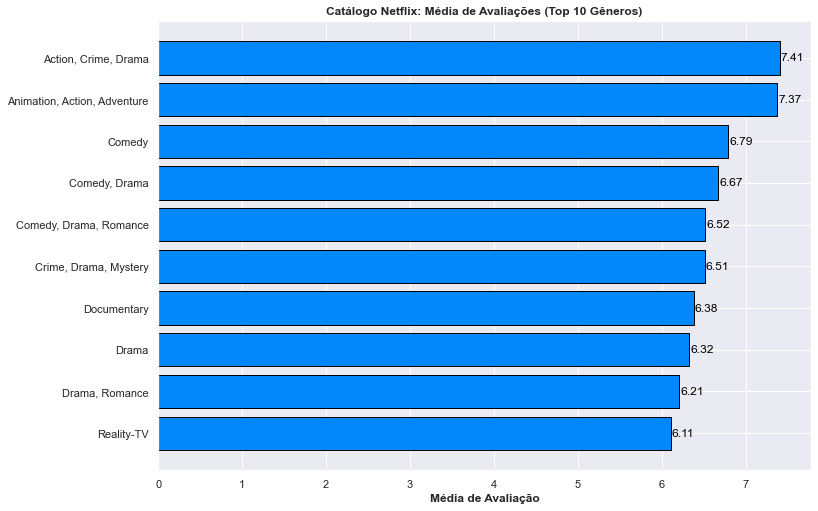

In [ ]:
# Bar chart

# Atribuindo dados para uma lista:
genres = list(top_genres['genre'])
ratings = list(top_genres['rating_mean'].sort_values(ascending=False))

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    genres,
    ratings, 
    align='center', 
    edgecolor='black',
    color='#0388fc'
    )
    
ax.set_yticks(genres)
ax.invert_yaxis()
ax.set_xlabel('Média de Avaliação', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Média de Avaliações (Top 10 Gêneros)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.2f', fontsize=12, color='#000000', padding=1)

plt.show()

Os programas mais bem avaliados na média são aqueles de Ação, Crime e Drama, seguidos por Animações de Ação e Aventura.

Curiosamente esses dois gêneros também são os de minutagem média mais alta dos programas abaixo de 175 minutos, e Reality-TV, além de ser o de menor minutagem média, também possuí a menor média de avaliações positivas no catálogo.

Isso pode indentificar um padrão de consumo nos clientes Netflix, onde aparenta-se que consumidores do serviço de streaming tendem a preferir programas de maior minutagem e incluso nessa métrica também, os programas especiais de Comédia, que também constam como uns dos gêneros de maior minutagem média e agora de acordo com o gráfico, também aparecem como o terceiro mais bem avaliado.

#### Resposta 2: df_movies_long

In [ ]:
# Redefinindo os top 10 gêneros:
long_gens = df_long_duration['genre'].value_counts().head(10)

# Passando para uma lista:
lista_long_gens = list(long_gens.index)

# Coletando as avaliações dadas aos projetos presentes nesses gêneros:
top_longs = df_long_duration.loc[
    (df_long_duration['genre'].isin(lista_long_gens)), 
    ['genre', 'rating']
    ]

# Reagrupando:
top_longs = top_longs.groupby('genre').mean()

# Visualizando:
top_longs

,rating
genre,
"Action, Adventure, Drama",7.833333
"Biography, Crime, Drama",7.966667
"Crime, Drama",6.950000
"Crime, Drama, Mystery",6.954545
Documentary,7.608333
"Documentary, Crime",7.273913
"Documentary, Crime, Mystery",7.060000
Drama,7.500000
"Drama, Horror, Mystery",6.960000


In [ ]:
# Dando unstack e reindexação no DataFrame:
top_longs = top_longs.unstack().reset_index()
top_longs = top_longs.drop(
    'level_0', axis=1
    )
top_longs = top_longs.rename(
    columns={0:'rating_mean'}
    )

# Visualizando
top_longs

,genre,rating_mean
0,"Action, Adventure, Drama",7.833333
1,"Biography, Crime, Drama",7.966667
2,"Crime, Drama",6.950000
3,"Crime, Drama, Mystery",6.954545
4,Documentary,7.608333
5,"Documentary, Crime",7.273913
6,"Documentary, Crime, Mystery",7.060000
7,Drama,7.500000
8,"Drama, Horror, Mystery",6.960000
9,"Drama, Mystery, Thriller",6.620000


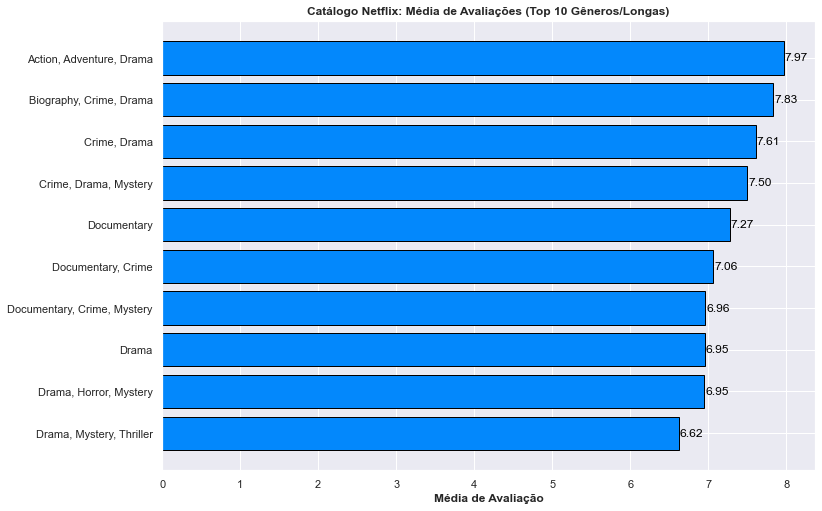

In [ ]:
# Bar chart

# Atribuindo dados para uma lista:
gens_long = list(top_longs['genre'])
means_long = list(top_longs['rating_mean'].sort_values(ascending=False))

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    gens_long, 
    means_long, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )
    
ax.set_yticks(gens_long)
ax.invert_yaxis()
ax.set_xlabel('Média de Avaliação', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Média de Avaliações (Top 10 Gêneros/Longas)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.2f', fontsize=12, color='#000000', padding=1)

plt.show()

Algo a se destacar é o fato de que os projetos que aparecem com duração maior de 175 minutos, possuem avaliações médias mais altas no geral quando comparados aos outros projetos menores. Basta aferir os valores dessas notas médias dos longas em comparação com o mesmo gráfico do df_movies_clean:

**df_movies_clean**
    
    - Maiores notas: 7.41, 7.37, 6.79
    - Menores notas: 6.11, 6.21, 6.32

**df_movies_long**

    - Maiores notas: 7.97, 7.83, 7.61
    - Menores notas: 6.62, 6.95, 6.95

Com isso, podemos identificar novamente o aparente padrão que os dados apresentam, onde projetos mais longos aparentam ter recepções e avaliações melhores no catálogo Netflix.

### 6. Quais são os programas mais bem avaliados no geral?


Como uma pergunta final, vamos buscar compreender quais são os registros que constam com maior avaliação no geral no catálogo Netflix, com base nos nossos dois Datasets:

#### Resposta 1: df_movies_clean

In [ ]:
# Filtrando Dataset em busca dos programas mais bem avaliados:
ratings_list = df_movies_clean.loc[
    :, 
    ['title', 'genre', 'rating', 'votes']
    ].sort_values(['rating'], ascending=False).head(10)

# Resetando index:
ratings_list = ratings_list.reset_index()
ratings_list = ratings_list.drop(columns={'index'})

# Visualizando:
ratings_list

,title,genre,rating,votes
0,BoJack Horseman,"Animation, Comedy, Drama",9.9,16066
1,Avatar: The Last Airbender,"Animation, Action, Adventure",9.6,3953
2,Stranger Things,"Drama, Fantasy, Horror",9.6,36276
3,JoJo's Bizarre Adventure,"Animation, Action, Adventure",9.6,1442
4,1899,"Drama, History, Horror",9.6,853
5,Avatar: The Last Airbender,"Animation, Action, Adventure",9.6,5221
6,Dexter,"Crime, Drama, Mystery",9.6,10604
7,BoJack Horseman,"Animation, Comedy, Drama",9.5,6230
8,Dark,"Crime, Drama, Mystery",9.5,14007
9,Anne with an E,"Drama, Family",9.5,2488


O programa que consta com a maior avaliação com um surpreendente 9.9 é BoJack Horseman, um clássico presente no catálogo, seguido por um episódio específico de Avatar: The Last Airbender e um episódio de Stranger Things.

É interessante notar que BoJack Horseman além de ser o número, aparece novamente na posição 7 com outro episódio com avaliação 9.5.

Avatar: The Last Airbender também se repete e apare nas posições 2 (de index 1) e 6 (index 5).

#### Resposta 2: df_long_movies

In [ ]:
# Filtrando Dataset em busca dos programas mais bem avaliados:
ratings_long = df_long_duration.loc[
    :, 
    ['title', 'genre', 'rating', 'votes']
    ].sort_values(['rating'], ascending=False).head(10)

# Resetando index:
ratings_long = ratings_long.reset_index()
ratings_long = ratings_long.drop(columns={'index'})

# Visualizando:
ratings_long

,title,genre,rating,votes
0,Cosmos: A Spacetime Odyssey,Documentary,9.3,121400
1,Our Planet,Documentary,9.3,43175
2,The Last Dance,"Documentary, Biography, History",9.1,119768
3,The Vietnam War,"Documentary, History, War",9.1,24632
4,Frozen Planet,Documentary,9.0,30498
5,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",9.0,1819157
6,When They See Us,"Biography, Crime, Drama",8.9,119339
7,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",8.8,1844075
8,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",8.8,1844055
9,The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",8.8,1642708


O longa mais bem avaliado é a série documentária sobre o espaço, Cosmos: A Spacetime Odyssey com 9.3, um valor muito bom porém 0.6 pontos abaixo de BoJack Horseman. No geral, as avaliações dos longas aparentam ser menores em relação aos programas mais curtos, uma inversão curiosa do padrão visto até aqui, onde os longas tiveram avaliações em média mais alta do que os curtos.

Isso pode aparentar que, por mais que os top 10 programas individuais longas tem avaliações menores do que os curtos, no catálogo como um todo eles possuem avaliações médias mais altas, indicando uma consistência de qualidade e satisfação do cliente maior com tais projetos.

### Bônus: Quais correlações gerais podemos estrair dos dados?

Como um bônus de encerramento, vamos analisar as correlações entre as tabelas do Dataset e tentar aferir as características que vimos até aqui.

In [ ]:
# Correlação do primeiro DataFrame:
df_movies_clean.corr()

,release_year,ending_year,duration_min,rating,votes
release_year,1.000000,0.017995,0.004520,0.176815,0.002592
ending_year,0.017995,1.000000,-0.281208,0.275709,0.066237
duration_min,0.004520,-0.281208,1.000000,-0.001992,0.156147
rating,0.176815,0.275709,-0.001992,1.000000,0.128175
votes,0.002592,0.066237,0.156147,0.128175,1.000000


In [ ]:
# Correlação do segundo Dataframe:
df_long_duration.corr()

,release_year,ending_year,duration_min,rating,votes
release_year,1.000000,-0.051874,0.090713,-0.186243,-0.318940
ending_year,-0.051874,1.000000,0.170469,0.093072,-0.056761
duration_min,0.090713,0.170469,1.000000,0.331182,-0.120481
rating,-0.186243,0.093072,0.331182,1.000000,0.287831
votes,-0.318940,-0.056761,-0.120481,0.287831,1.000000


Um ponto interessante é a têndencia préviamente observada de que projetos longos tem uma têndencia a ter avaliações mais altas e o inverso acontecendo no primeiro dataset.

**df_movies_clean**

    Correlação rating e duration_min:
        -0.001992

Uma correlação pequena, porem que tende para baixo. Ou seja, quanto maior a avaliação do projeto, menor ele é ou vice versa.

**df_long_movies**

    Correlação rating e duration_min:
        0.331182

Uma correlação bem mais pronunciada do que a do primeiro dataset. Quanto maior a avaliação do projeto, mais longo ele é, o inverso do ocorrido nos projetos menores, comprovando a tendência já observada ao longo das análises.